In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/kidney_disease.csv')
data.head()
# id=id
# age=age
# bp=blood pressure
# sg=specific gravity
# al=albumin
# su=sugar
# rbc=red blood cells
# pc=pus cells
# pcc=pus cells clumps
# ba=bacteria
# bgr=blood glucose random
# bu=blood urea 
# sc=serum creatinine
# sod=sodium
# pot=potassium
# hemo=hemoglobin
# pcv=packed cell volume
# wc= white blood cell
# rc=red blood cell
# htn=hypertension
# dm=diabetes mellitus
# cad= coronary artery disease
# appet=appetite
# pe=pedal edema
# ane - anemia
# class=class

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data['rc'].mode()

0    5.2
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
print('before removing null values')
100*data.isnull().sum()/len(data)

before removing null values


id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [ ]:
print('mean age in data is:', data.age.mean())
value_mean=52
print('replacing NA values wit 51')
data.age.fillna(value=value_mean,inplace=True)
print('total null values after updating with mean value:',data.age.isnull().sum())

mean age in data is: 51.48337595907928
replacing NA values wit 51
total null values after updating with mean value: 0


In [ ]:

print('mean bp in data is:', data.bp.mean())
value_mean=76
print('replacing NA values wit 76')
data.bp.fillna(value=value_mean,inplace=True)
print('total null values after updating with mean value:',data.bp.isnull().sum())
# data.bp.mean()

mean bp in data is: 76.46907216494846
replacing NA values wit 76
total null values after updating with mean value: 0


In [ ]:
data.fillna({'sg':data.sg.mean(),'al':data.al.mean(),'su':'0.0','bgr':'99.0','bu':'46.0','sc':'1.2','sod':data.sod.mean(),'pot':'3.5','hemo':data.hemo.mean(),'pc':'normal','pcc':'notpresent','ba':'notpresent','pcv':'41','htn':'no','dm':'no','cad':'no','appet':'good','pe':'no','ane':'no','rbc':'normal','wc':'9800','rc':'5.2'},inplace=True)

In [ ]:

print('after transformation')
100*data.isnull().sum()/len(data)

after transformation


id                0.0
age               0.0
bp                0.0
sg                0.0
al                0.0
su                0.0
rbc               0.0
pc                0.0
pcc               0.0
ba                0.0
bgr               0.0
bu                0.0
sc                0.0
sod               0.0
pot               0.0
hemo              0.0
pcv               0.0
wc                0.0
rc                0.0
htn               0.0
dm                0.0
cad               0.0
appet             0.0
pe                0.0
ane               0.0
classification    0.0
dtype: float64

In [ ]:
#removing because null values greater then 25%
# data=data.drop(['rbc','wc','rc'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    object 
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    object 
 11  bu              400 non-null    object 
 12  sc              400 non-null    object 
 13  sod             400 non-null    float64
 14  pot             400 non-null    object 
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [ ]:
for i in data.columns:
  print('*********************************************************************************')
  print(i)
  print(set(data[i].tolist()))

*********************************************************************************
id
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,

In [ ]:
data['dm']=data['dm'].replace(['\tno','\tyes',' yes'],['no','yes','yes'])
data['pcv']=data['pcv'].replace(['\t43','\t?'],['43','37'])
data['wc']=data['wc'].replace(['\t?','\t8400','\t6200'],['3','8400','6200'])
data['rc']=data['rc'].replace(['\t?'],['3'])
data['cad']=data['cad'].replace(['\tno'],['no'])
data['classification']=data['classification'].replace(['ckd\t'],'ckd')

In [ ]:
data.head(1)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,137.528754,3.5,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    object 
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    object 
 11  bu              400 non-null    object 
 12  sc              400 non-null    object 
 13  sod             400 non-null    float64
 14  pot             400 non-null    object 
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [ ]:
data['su']=data['su'].astype('float')
data['bgr']=data['bgr'].astype('float')
data['bu']=data['bu'].astype('float')
data['sc']=data['sc'].astype('float')
# data['sod']=data['sod'].astype('float')
data['pot']=data['pot'].astype('float')
# data['hemo']=data['hemo'].astype('float')
data['pcv']=data['pcv'].astype('float')
data['hemo']=data['hemo'].astype('float')
data['wc']=data['wc'].astype('float')
data['rc']=data['rc'].astype('float')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.750,199.500000,299.250,399.000
age,400.0,51.495000,16.975140,2.000,42.000,54.000000,64.000,90.000
bp,400.0,76.455000,13.476536,50.000,70.000,78.000000,80.000,180.000
sg,400.0,1.017408,0.005369,1.005,1.015,1.017408,1.020,1.025
al,400.0,1.016949,1.272318,0.000,0.000,1.000000,2.000,5.000
su,400.0,0.395000,1.040038,0.000,0.000,0.000000,0.000,5.000
bgr,400.0,142.642500,76.344226,22.000,99.000,114.500000,150.000,490.000
bu,400.0,56.883000,49.345921,1.500,27.000,44.000000,61.750,391.000
sc,400.0,2.992875,5.630207,0.400,0.900,1.200000,2.725,76.000
sod,400.0,137.528754,9.204273,4.500,135.000,137.528754,141.000,163.000


In [ ]:
# # replace_values={'\tno':no,'\tyes':yes,' yes':yes}
# data['dm']=data['dm'].replace(['\tno','\tyes',' yes'],['no','yes','yes'])
# data['pcv']=data['pcv'].replace(['\t43','\t?'],['43','37'])
# # data['rc']=data['rc'].replace(['\t?'],['3'])
# data['cad']=data['cad'].replace(['\tno'],['no'])
# data['classification']=data['classification'].replace(['ckd\t'],'ckd')

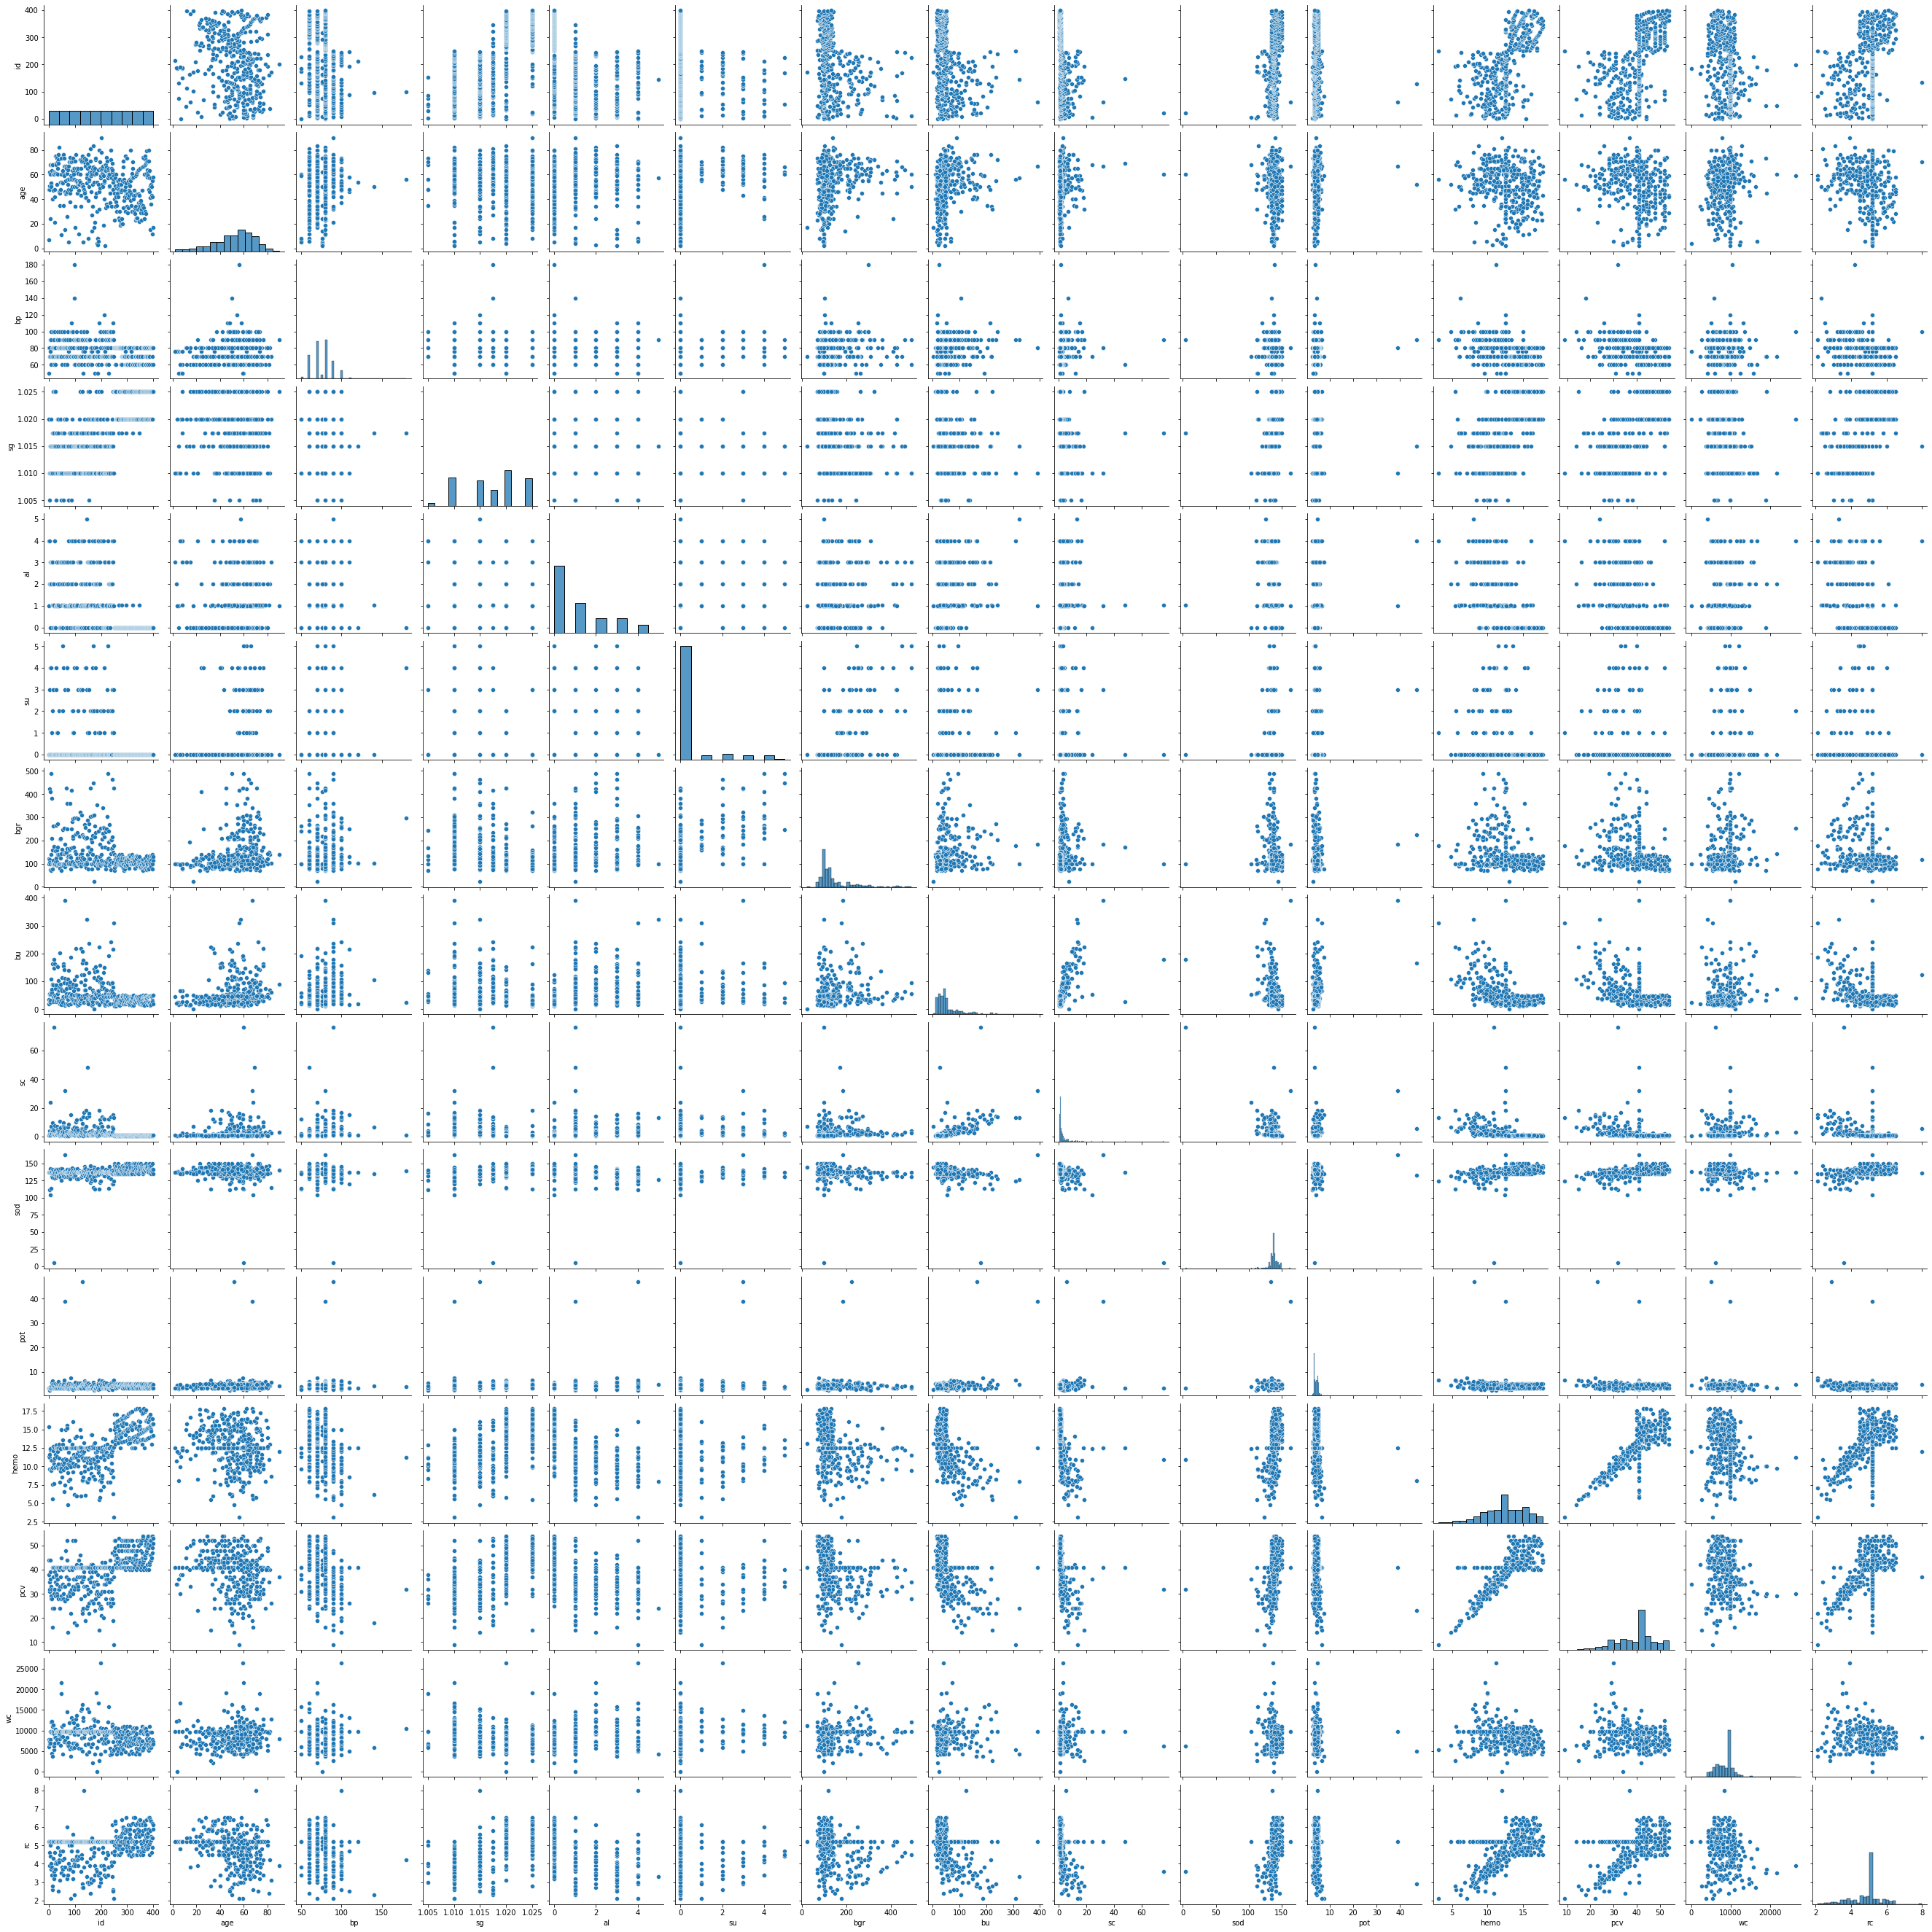

In [ ]:
sns.pairplot(data)

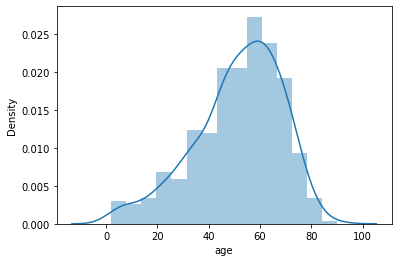

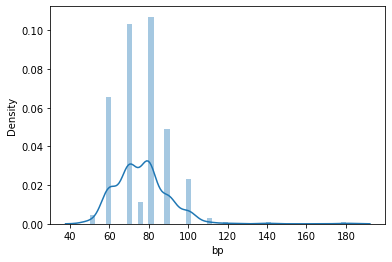

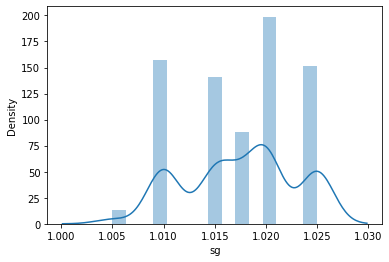

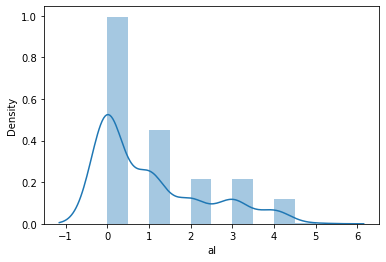

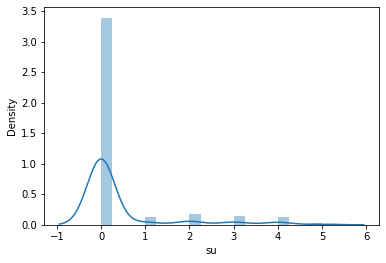

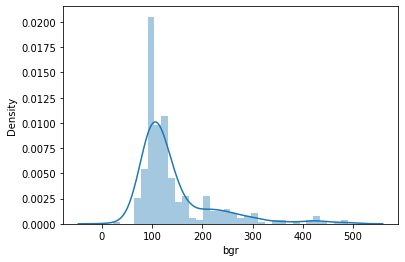

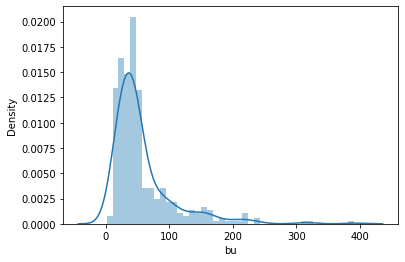

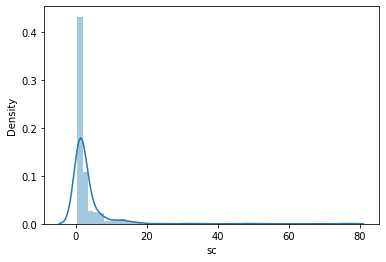

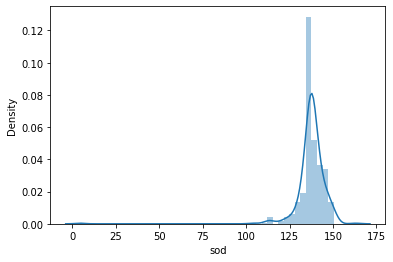

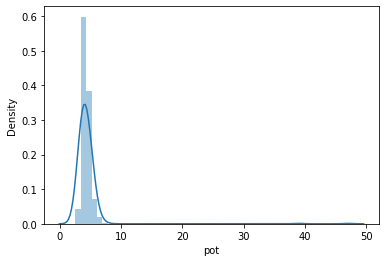

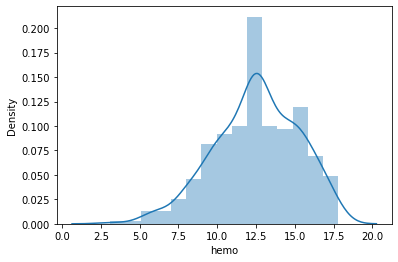

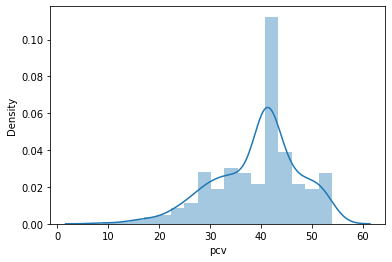

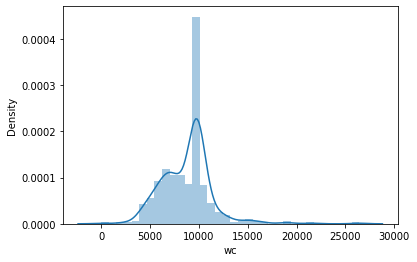

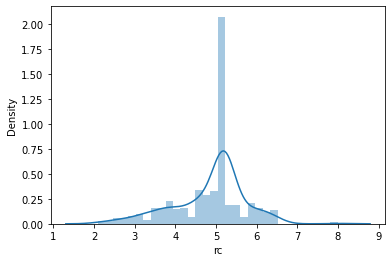

In [ ]:
#distribution of data
def distplots(col):
  sns.distplot(data[col])
  plt.show()

for i in list(data.select_dtypes(exclude=['object']).columns)[1:]:
  distplots(i)

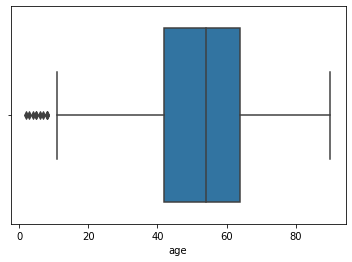

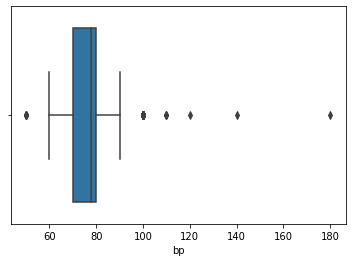

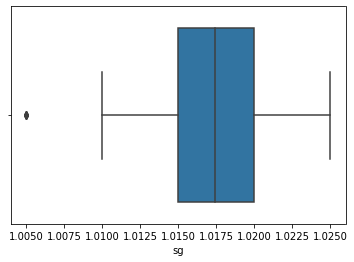

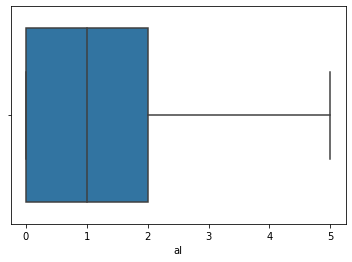

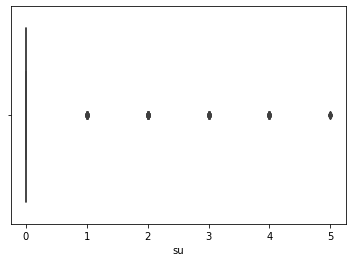

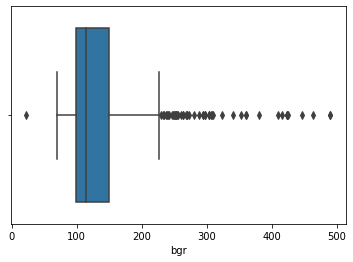

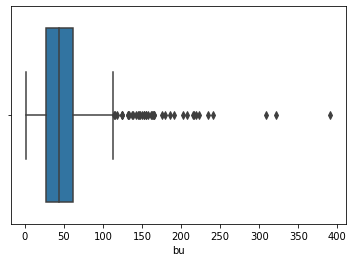

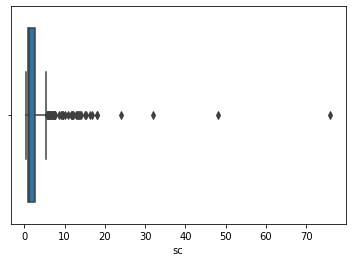

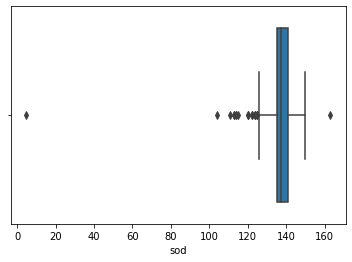

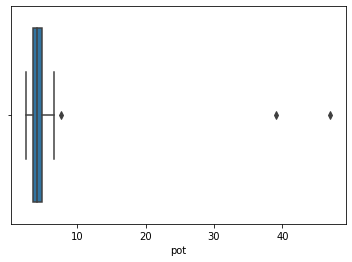

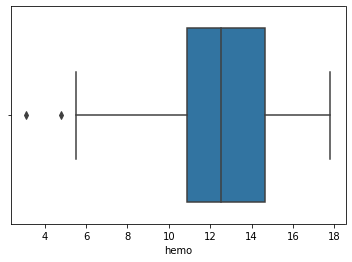

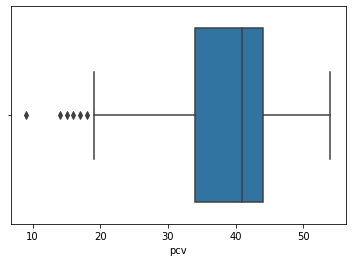

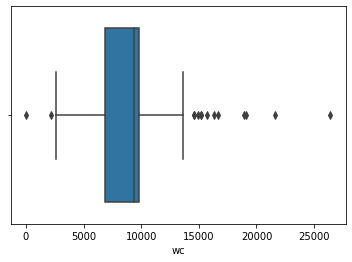

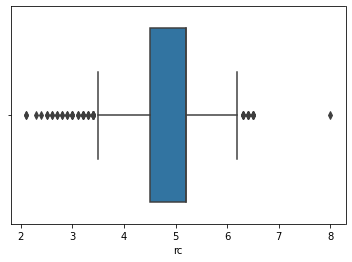

In [ ]:
def boxplots(col):
  sns.boxplot(data[col])
  plt.show()
for i in list(data.select_dtypes(exclude=['object']).columns)[1:]:
  boxplots(i)

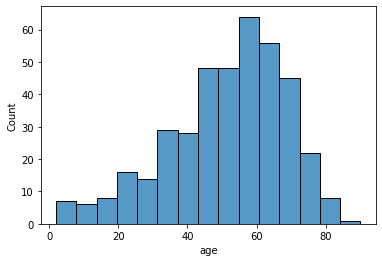

In [ ]:
sns.histplot(data.age)

Text(0.5, 1.0, 'Distribution of age of client')

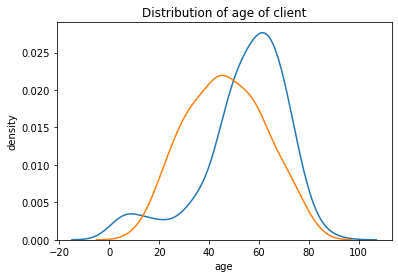

In [ ]:
sns.kdeplot(data.loc[data['classification']=='ckd','age'],label='ckd')
sns.kdeplot(data.loc[data['classification']=='notckd','age'],label='non-ckd')
plt.xlabel('age')
plt.ylabel('density')
plt.title('Distribution of age of client')

Text(0.5, 1.0, 'Distribution of no. of patient VS Hypertension')

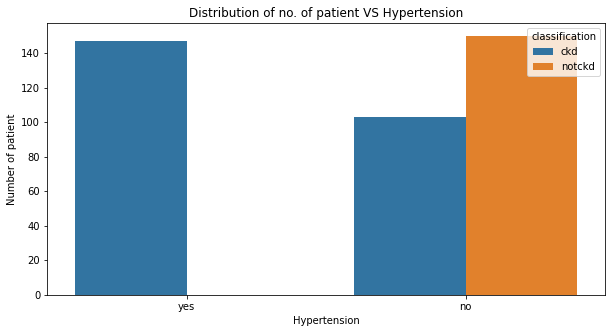

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['htn'],hue=data['classification'])
plt.xlabel('Hypertension')
plt.ylabel('Number of patient')
plt.title('Distribution of no. of patient VS Hypertension')

Text(0.5, 1.0, 'Distribution of no. of patient VS Appetite')

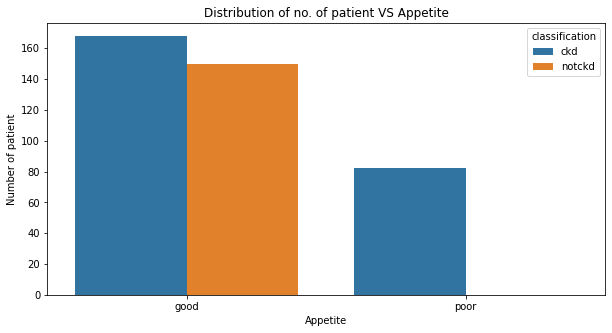

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['appet'],hue=data['classification'])
plt.xlabel('Appetite')
plt.ylabel('Number of patient')
plt.title('Distribution of no. of patient VS Appetite')


Text(0.5, 1.0, 'Distribution of no. of patient VS diabetes')

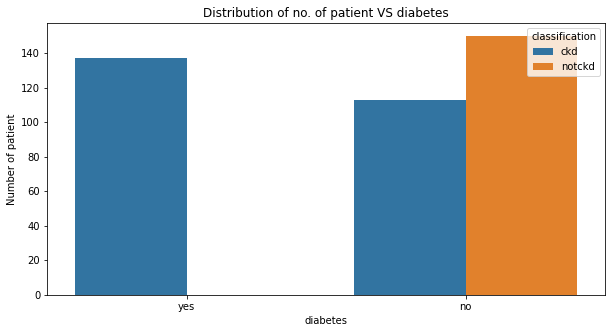

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['dm'],hue=data['classification'])
plt.xlabel('diabetes')
plt.ylabel('Number of patient')
plt.title('Distribution of no. of patient VS diabetes')

In [ ]:
data.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

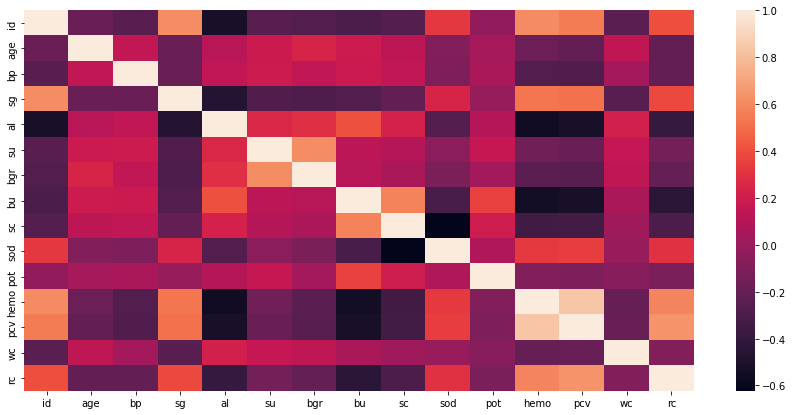

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))

sns.heatmap(data.corr())

In [ ]:
data.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
id,1.000000,-0.184382,-0.243476,0.613623,-0.520040,-0.247181,-0.276397,-0.299671,-0.263150,0.323064,-0.029259,0.609503,0.554352,-0.240671,0.400286
age,-0.184382,1.000000,0.149433,-0.180844,0.115116,0.187499,0.241863,0.191754,0.133855,-0.085999,0.047600,-0.175855,-0.209845,0.141145,-0.204782
bp,-0.243476,0.149433,1.000000,-0.182068,0.146396,0.190277,0.149518,0.183561,0.144620,-0.103386,0.056631,-0.279455,-0.285913,0.039539,-0.205552
sg,0.613623,-0.180844,-0.182068,1.000000,-0.466698,-0.282115,-0.290787,-0.275986,-0.209781,0.242841,-0.009369,0.531755,0.514366,-0.245013,0.381306
al,-0.520040,0.115116,0.146396,-0.466698,1.000000,0.261983,0.292746,0.406792,0.232768,-0.271316,0.094491,-0.549697,-0.517897,0.221008,-0.391554
su,-0.247181,0.187499,0.190277,-0.282115,0.261983,1.000000,0.619062,0.126730,0.096527,-0.053452,0.165059,-0.156876,-0.180186,0.162455,-0.146256
bgr,-0.276397,0.241863,0.149518,-0.290787,0.292746,0.619062,1.000000,0.111672,0.059321,-0.114771,0.042240,-0.241329,-0.249429,0.140012,-0.198721
bu,-0.299671,0.191754,0.183561,-0.275986,0.406792,0.126730,0.111672,1.000000,0.581618,-0.306786,0.348128,-0.541705,-0.518755,0.059145,-0.439039
sc,-0.263150,0.133855,0.144620,-0.209781,0.232768,0.096527,0.059321,0.581618,1.000000,-0.622666,0.200280,-0.343427,-0.333840,0.021638,-0.295361
sod,0.323064,-0.085999,-0.103386,0.242841,-0.271316,-0.053452,-0.114771,-0.306786,-0.622666,1.000000,0.080826,0.333614,0.342937,-0.002176,0.300111


In [ ]:
for i in data.select_dtypes(exclude=['float']).columns:
  data[i]=data[i].astype('category')
  data[i]=data[i].cat.codes

In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,137.528754,3.5,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,18.0,0.8,137.528754,3.5,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,137.528754,3.5,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.000000,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,137.528754,3.5,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
data['classification'].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,137.528754,3.5,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,18.0,0.8,137.528754,3.5,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,137.528754,3.5,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.000000,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,137.528754,3.5,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
x=data.drop(['id','classification'],axis=1)
y=data['classification']


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print(Counter(y))

Counter({0: 250, 1: 150})


In [ ]:
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x_ros)
y=y_ros
x

array([[ 0.04545455, -0.53846154,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.88636364, -1.        ,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.36363636, -0.53846154, -0.5       , ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [ 0.61363636, -0.53846154,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.20454545, -0.53846154,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.20454545, -0.53846154,  0.5       , ..., -1.        ,
        -1.        , -1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
print(x_train.shape,y_test.shape)

(350, 24) (150,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)
print('accuracy of the training model is :',accuracy_score(y_train,y_pred_train_rf))
print('accuracy of the testing model is :',accuracy_score(y_test,y_pred_test_rf))

accuracy of the training model is : 1.0
accuracy of the testing model is : 1.0


In [ ]:
# print(confusion_matrix(y_train, y_pred_train_rf))
# print("##########"*10)
# print(confusion_matrix(y_test, y_pred_test_rf))

In [ ]:
# print(classification_report(y_train, y_pred_train_rf))
# print("##########"*10)
# print(classification_report(y_test, y_pred_test_rf))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
rf=DecisionTreeClassifier()
rf.fit(x_train,y_train)
y_pred_train_dt=rf.predict(x_train)
y_pred_test_dt=rf.predict(x_test)
print('accuracy of the training model is :',accuracy_score(y_train,y_pred_train_dt))
print('accuracy of the testing model is :',accuracy_score(y_test,y_pred_test_dt))

accuracy of the training model is : 1.0
accuracy of the testing model is : 0.9866666666666667


In [ ]:
print(confusion_matrix(y_train, y_pred_train_dt))
print("##########"*10)
print(confusion_matrix(y_test, y_pred_test_dt))

[[183   0]
 [  0 167]]
####################################################################################################
[[67  0]
 [ 2 81]]


In [ ]:
!pip install lightgbm
from lightgbm import LGBMClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = LGBMClassifier(learning_rate=0.09,random_state=42)
model.fit(x_train,y_train)
y_pred_train_lgb=model.predict(x_train)
y_pred_test_lgb=model.predict(x_test)
print('accuracy of the training model is :',accuracy_score(y_train,y_pred_train_lgb))
print('accuracy of the testing model is :',accuracy_score(y_test,y_pred_test_lgb))

accuracy of the training model is : 1.0
accuracy of the testing model is : 0.9933333333333333


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred_train_knn=model.predict(x_train)
y_pred_test_knn=model.predict(x_test)
print('accuracy of the training model is :',accuracy_score(y_train,y_pred_train_knn))
print('accuracy of the testing model is :',accuracy_score(y_test,y_pred_test_knn))